<a href="https://colab.research.google.com/github/ssanchezgoe/curso_deep_learning_economia/blob/main/NBs_Google_Colab/DL_S04_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> Curso Deep Learning: Economía</h1>

## S04: Regresión Lineal

## Regresión Lineal

El problema de regresión lineal en una dimensión tiene como objetivo ajustar una variable numérica y continua,$y$, a una variable independiente $x$, por medio de un modelo lineal

$$y = mx + b$$

en donde los parámetros corresponden a:

- $m$ pendiente de la recta.
- $b$ intercepto con el eje $y$.

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from numpy.random import randn
from numpy.random import seed

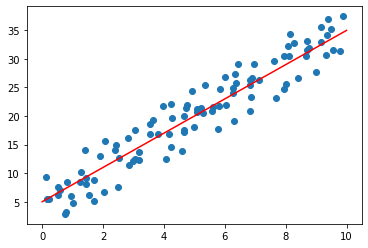

In [61]:
x=10*np.random.rand(100)
e=10*(np.random.rand(100)-0.5)
y=3*x+5+e
plt.scatter(x,y)
plt.plot(np.arange(0,11),3*np.arange(0,11)+5,c='r')
plt.show()

La correlación entre ambos datos esta dada por:

In [62]:
# Cálculo de la correlación de pearson.
corr, _ = pearsonr(x, y)
corr

0.9524120822657831

La línea recta sobre los puntos representa la tendencia del ajuste. En la figura se puede observar que esta línea no se ajusta a cada uno de los puntos; en su lugar, marca una tendencia promedio, por lo que se puede obtener un error en el ajuste a través de la distancia promedio de los puntos a la línea de tendencia:

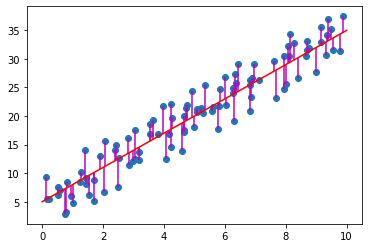

In [63]:
plt.errorbar(x,y,yerr=np.c_[e,np.zeros_like(e)].T,fmt='none',c='m')
plt.scatter(x,y)
plt.plot(np.arange(0,11),3*np.arange(0,11)+5,c='r')
plt.show()

### Mínimos Cuadrados: Solución Analítica

Al rededor de 1800 Carl Friederich Gauss y Adrien-Marie Legendre encontraron la forma de realizar un ajuste lineal, al minimizar la suma de los errores cuadráticos (MSE):

$$\text{MSE} = \frac{1}{N}\sum_{i=1}^N(\hat{y}_i-y_i)^2$$

en donde 

- $\hat{y}_i$ corresponde al i-ésimo valor predicho por el modelo.
- $y_i$ corresponde al i-ésimo valor del conjunto de datos de la variable objetivo.

Se puede mostrar que los valores de la pendiente $m$ y el intercepto $c$ que minimizan la ecuación $y = mx + b$ están dados por

$$m=\frac{\bar{xy}-\bar{x}\bar{y}}{\bar{x^2}-\bar{x}^2}$$

$$b=\bar{y}-m\bar{x}$$

en donde las cantidades con una barra corresponden a sus valores promedio.

Los valores optimos serán entonces

In [64]:
N=len(x)
m=(np.sum(x*y)-np.sum(x)*np.sum(y)/N)/(np.sum(x*x)-np.sum(x)**2/N)
b=(np.sum(y)-m*np.sum(x))/N

print('m',m)
print('b',b)

m 3.0737913166825632
b 4.74252708886512


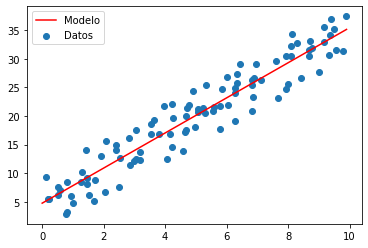

In [65]:
plt.scatter(x,y)
plt.plot(np.arange(0,10,10/100), m*np.arange(0,10,10/100)+b, c='r')
plt.legend(["Modelo","Datos"])
plt.show()

In [67]:
 print(f"MSE: {mean_squared_error(y, m*x+b)}")

MSE: 7.649746623862825


El problema multidimensional de un ajuste lineal puede ser escrito como:

$$y=a_0+a_1 x_1+a_2 x_2+...+a_m x_m=\sum_{j=0}^m a_m x_m$$

El cual puede ser resuelto analíticamente como:

$$\vec{a}=(a_0,a_1,...,a_m)=(X^T X)^{-1}X^T y$$

Para lo que ser requiere de la inversión de la matriz $X^T X$

In [16]:
X=np.c_[np.ones_like(x),x]
params = np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,y))
params

array([4.82894912, 3.07797659])

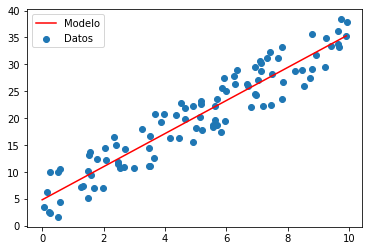

In [22]:
plt.scatter(x,y)
plt.plot(np.arange(0,10,10/100), params[1]*np.arange(0,10,10/100)+params[0], c='r')
plt.legend(["Modelo","Datos"])
plt.show()

In [68]:
print(f"MSE: {mean_squared_error(y, params[1]*x+params[0])}")

MSE: 7.661360632863071


No obstante, si se poseen variabes características, la ecuación normal puede resultar computacionalmente lenta, debido a la inversión matricial que se reaquiere calcular. Para evitar esto, se hace uso de la técnica de descenso del gradiente.

##  Solución en `sklearn`:

La solución estándar en `sklearn` consiste en la siguientes líneas:

In [24]:
lr = linear_model.LinearRegression()
lr.fit(x.reshape(-1,1),y)
print(f"{lr.intercept_, lr.coef_[0]}")

(4.828949120212249, 3.077976593354506)


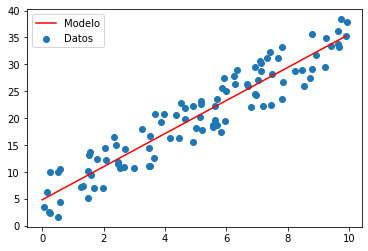

In [25]:
plt.scatter(x,y)
plt.plot(np.arange(0,10,10/100), lr.coef_[0]*np.arange(0,10,10/100)+lr.intercept_, c='r')
plt.legend(["Modelo","Datos"])
plt.show()

In [69]:
print(f"MSE: {mean_squared_error(y, lr.coef_[0]*x+lr.intercept_)}")

MSE: 7.661360632863069


Si usamos decenso de gradiente, usamos el objeto de `sklearn` `SGDRegresor`:

In [70]:
model = SGDRegressor(max_iter=1000, tol=0.001, eta0=0.1)
model.fit(x.reshape(-1,1),y)
print(f"{model.intercept_, model.coef_[0]}")

(array([4.80877117]), 3.5960426216356947)


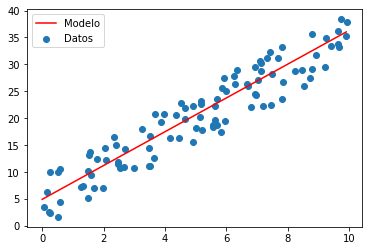

In [41]:
plt.scatter(x,y)
plt.plot(np.arange(0,10,10/100), model.coef_[0]*np.arange(0,10,10/100)+model.intercept_, c='r')
plt.legend(["Modelo","Datos"])
plt.show()

In [71]:
print(f"MSE: {mean_squared_error(y, model.coef_[0]*x+model.intercept_)}")

MSE: 16.82552368120105


## Solución en `keras`:

En `keras`, para implementar una regresión lineal, se programa una sola capa sin función de activación:

In [74]:
from tensorflow import keras

In [75]:
keras.backend.clear_session()
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_shape=(1,)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(keras.optimizers.Adam(learning_rate=0.9), 'mean_squared_error')

In [77]:
model.fit(x,y,epochs=30)

Epoch 1/30
4/4 [==============================] - 0s 3ms/step - loss: 456.2131
Epoch 2/30
4/4 [==============================] - 0s 3ms/step - loss: 18.5806
Epoch 3/30
4/4 [==============================] - 0s 3ms/step - loss: 125.9257
Epoch 4/30
4/4 [==============================] - 0s 2ms/step - loss: 65.7350
Epoch 5/30
4/4 [==============================] - 0s 2ms/step - loss: 11.3638
Epoch 6/30
4/4 [==============================] - 0s 4ms/step - loss: 48.3632
Epoch 7/30
4/4 [==============================] - 0s 3ms/step - loss: 36.2739
Epoch 8/30
4/4 [==============================] - 0s 3ms/step - loss: 8.5948
Epoch 9/30
4/4 [==============================] - 0s 4ms/step - loss: 16.5298
Epoch 10/30
4/4 [==============================] - 0s 3ms/step - loss: 16.9188
Epoch 11/30
4/4 [==============================] - 0s 3ms/step - loss: 8.5103
Epoch 12/30
4/4 [==============================] - 0s 2ms/step - loss: 12.2922
Epoch 13/30
4/4 [==============================] - 0s 2ms/ste

In [78]:
m,b = model.get_weights()
print(f"{b[0],m[0][0]}")

(4.70833, 3.1171348)


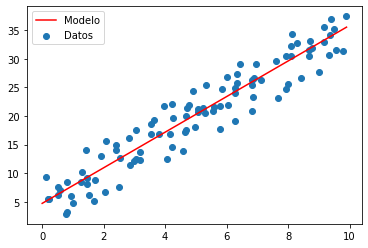

In [79]:
plt.scatter(x,y)
plt.plot(np.arange(0,10,10/100), m[0][0]*np.arange(0,10,10/100)+b[0], c='r')
plt.legend(["Modelo","Datos"])
plt.show()

In [80]:
print(f"MSE: {mean_squared_error(y, m[0][0]*x+b[0])}")

MSE: 7.697067364100239


## Ejercicios

Para el siguiente conjunto de puntos

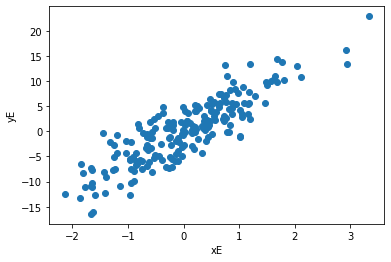

In [59]:
#@title Conjunto de datos xE, yE
from sklearn.datasets import make_regression

xE,yE = make_regression(n_samples=200, n_features=1, noise=3)
plt.scatter(xE,yE)
plt.xlabel("xE")
plt.ylabel("yE")
plt.show()

realice los ejercicios enumerados a continuación.

### Ejercicio 1:

Para este ejercicio: 
1. Realice un ajuste lineal, implementando una función para el método de mínimos cuadrados
2. Desarrolle una función que grafique el conjunto de datos y el modelo. 
3. Calcule el valor del error cuadrático medio.

### Ejercicio 2:

Para este ejercicio:
1. Realice un ajuste lineal siguiendo el método estándard de `skelearn`. 
2. Haga uso de la función implementada en el ejercicio 1 para visualizar los datos y el modelo.
3. Calcule el valor del error cuadrático medio.

### Ejercicio 3:

Para este ejercicio:
1. Realice un ajuste lineal siguiendo el método de descenso de gradiente estocástico implementado en `sklearn`, usando varios modelos en donde evalue varios valores de los parámetros vistos:

  - `max_iter`
  - `tol`
  - `eta0`

2. Visualice los datos junto al modelo, en cada conjunto de parámetros analizado.
3. Calcule el valor del error cuadrático medio.

### Ejercicio 4:

Para este ejercicio:
1. Realice un ajuste lineal implementando el método de `keras`. 
2. Visualice el modelo junto a los datos.
3. Calcule el valor del error cuadrático medio.